In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('combined_data_aqi.csv')
data

,lon,lat,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,dt
0,97.0253,4.3685,1,263.69,0.01,1.34,9.12,0.21,3.84,4.41,1.84,1706540400
1,97.0253,4.3685,1,257.02,0.03,1.52,6.79,0.24,3.80,4.49,2.53,1706544000
2,97.0253,4.3685,1,253.68,0.02,1.61,6.71,0.27,3.82,4.52,3.39,1706547600
3,97.0253,4.3685,1,253.68,0.01,1.59,8.67,0.27,3.87,4.57,4.37,1706551200
4,97.0253,4.3685,1,257.02,0.00,1.50,10.91,0.25,3.82,4.52,4.94,1706554800
...,...,...,...,...,...,...,...,...,...,...,...,...
206875,99.3812,2.1924,1,223.64,0.02,1.17,20.56,1.31,1.10,1.61,0.66,1730196000
206876,99.3812,2.1924,1,240.33,0.01,1.78,17.17,1.30,1.22,1.98,0.71,1730199600
206877,99.3812,2.1924,1,260.35,0.00,2.57,13.59,1.31,1.52,2.62,0.74,1730203200
206878,99.3812,2.1924,1,270.37,0.00,2.70,11.27,1.25,1.91,3.41,0.79,1730206800


In [3]:
data['datetime'] = pd.to_datetime(data['dt'], unit='s')
data.set_index('datetime', inplace=True)
data.drop(columns=['dt'], inplace=True)

In [4]:
print(data.head())

                         lon     lat  aqi      co    no   no2     o3   so2  \
datetime                                                                     
2024-01-29 15:00:00  97.0253  4.3685    1  263.69  0.01  1.34   9.12  0.21   
2024-01-29 16:00:00  97.0253  4.3685    1  257.02  0.03  1.52   6.79  0.24   
2024-01-29 17:00:00  97.0253  4.3685    1  253.68  0.02  1.61   6.71  0.27   
2024-01-29 18:00:00  97.0253  4.3685    1  253.68  0.01  1.59   8.67  0.27   
2024-01-29 19:00:00  97.0253  4.3685    1  257.02  0.00  1.50  10.91  0.25   

                     pm2_5  pm10   nh3  
datetime                                
2024-01-29 15:00:00   3.84  4.41  1.84  
2024-01-29 16:00:00   3.80  4.49  2.53  
2024-01-29 17:00:00   3.82  4.52  3.39  
2024-01-29 18:00:00   3.87  4.57  4.37  
2024-01-29 19:00:00   3.82  4.52  4.94  


In [5]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
                 lon            lat            aqi             co  \
count  206880.000000  206880.000000  206880.000000  206880.000000   
mean      113.810782      -2.565822       1.567237     539.546064   
std        10.221345       3.425097       1.122917     874.321921   
min        97.025300      -8.789300       1.000000      80.940000   
25%       104.580400      -4.205325       1.000000     208.620000   
50%       113.290300      -2.601400       1.000000     280.380000   
75%       120.697900       0.025950       2.000000     453.950000   
max       138.348500       4.368500       5.000000   13458.250000   

                  no            no2             o3            so2  \
count  206880.000000  206880.000000  206880.000000  206880.000000   
mean        0.661581       3.121272      22.623083       2.258373   
std         4.395044     176.733839      31.901438       6.558815   
min         0.000000   -9999.000000       0.000000       0.000000   
25%     

In [6]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
lon      0
lat      0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


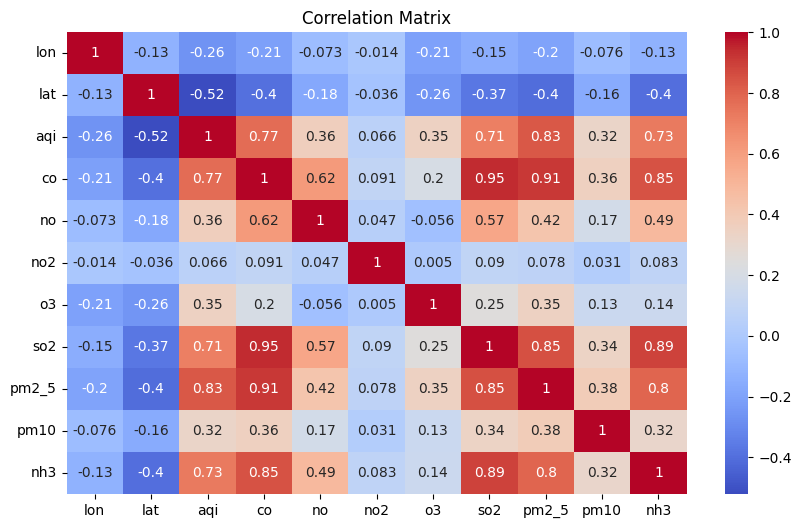

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

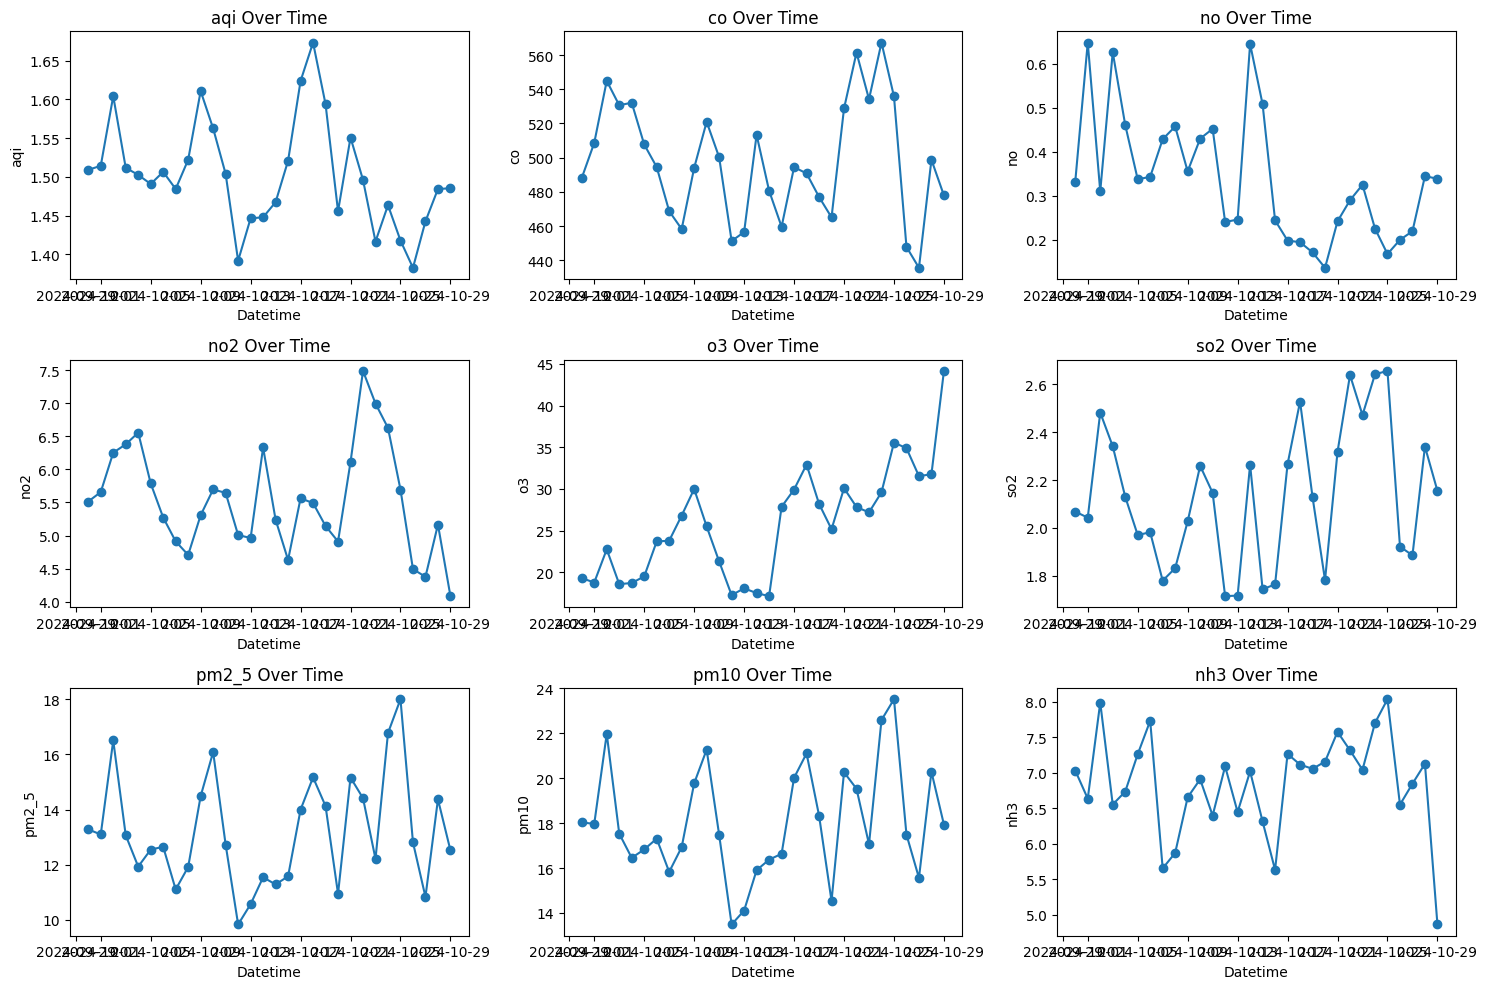

In [8]:
data_daily_sample = data.resample('D').mean()

last_30_days = data_daily_sample.tail(30)

components = ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plt.figure(figsize=(15, 10))
for i, component in enumerate(components, 1):
    plt.subplot(3, 3, i)
    plt.plot(last_30_days.index, last_30_days[component], marker='o')
    plt.title(f"{component} Over Time")
    plt.xlabel("Datetime")
    plt.ylabel(component)
plt.tight_layout()
plt.show()


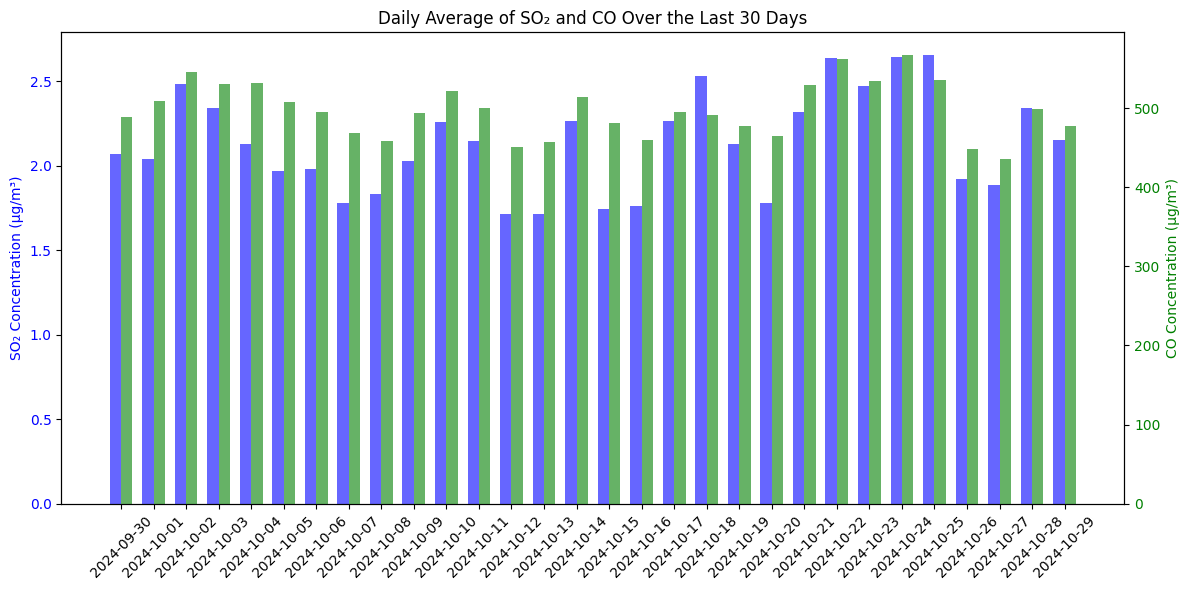

In [9]:
import matplotlib.pyplot as plt

# Prepare the data for the last 30 days
# Assuming `last_30_days` is a DataFrame with the daily averages of 'so2' and 'co'

# Create an index for the x-axis
x = range(len(last_30_days))

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for SO₂
ax1.bar(x, last_30_days['so2'], width=0.35, label='SO₂', color='blue', alpha=0.6)
ax1.set_ylabel('SO₂ Concentration (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for CO
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar([i + 0.35 for i in x], last_30_days['co'], width=0.35, label='CO', color='green', alpha=0.6)
ax2.set_ylabel('CO Concentration (µg/m³)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set x-ticks to the dates
ax1.set_xticks([i + 0.175 for i in x])  # Adjust for center alignment
ax1.set_xticklabels(last_30_days.index.strftime('%Y-%m-%d'), rotation=45)

# Labeling the plot
plt.title('Daily Average of SO₂ and CO Over the Last 30 Days')
fig.tight_layout()  # Adjust layout to fit the labels

# Show the plot
plt.show()


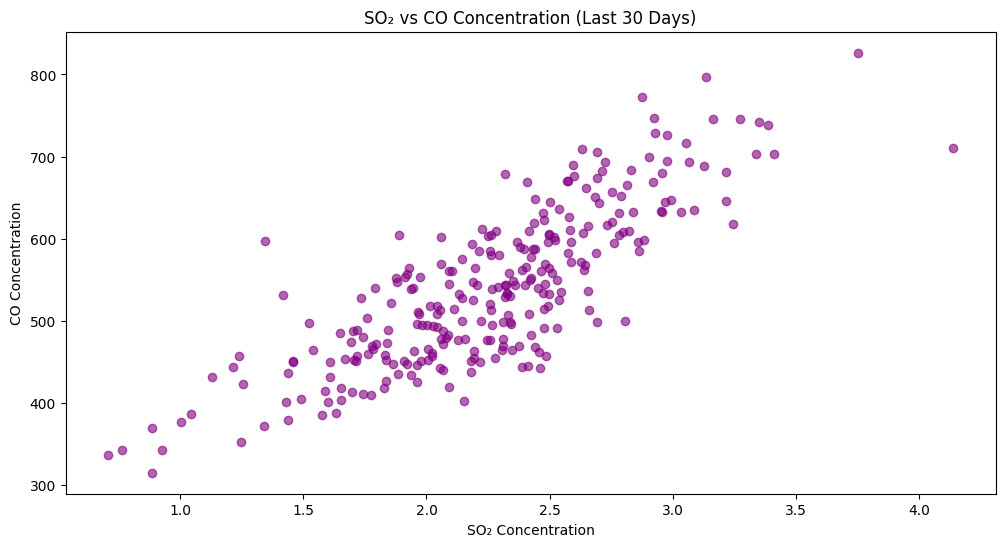

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(data_daily_sample['so2'], data_daily_sample['co'], color='purple', alpha=0.6)

plt.xlabel('SO₂ Concentration')
plt.ylabel('CO Concentration')
plt.title('SO₂ vs CO Concentration (Last 30 Days)')

plt.show()

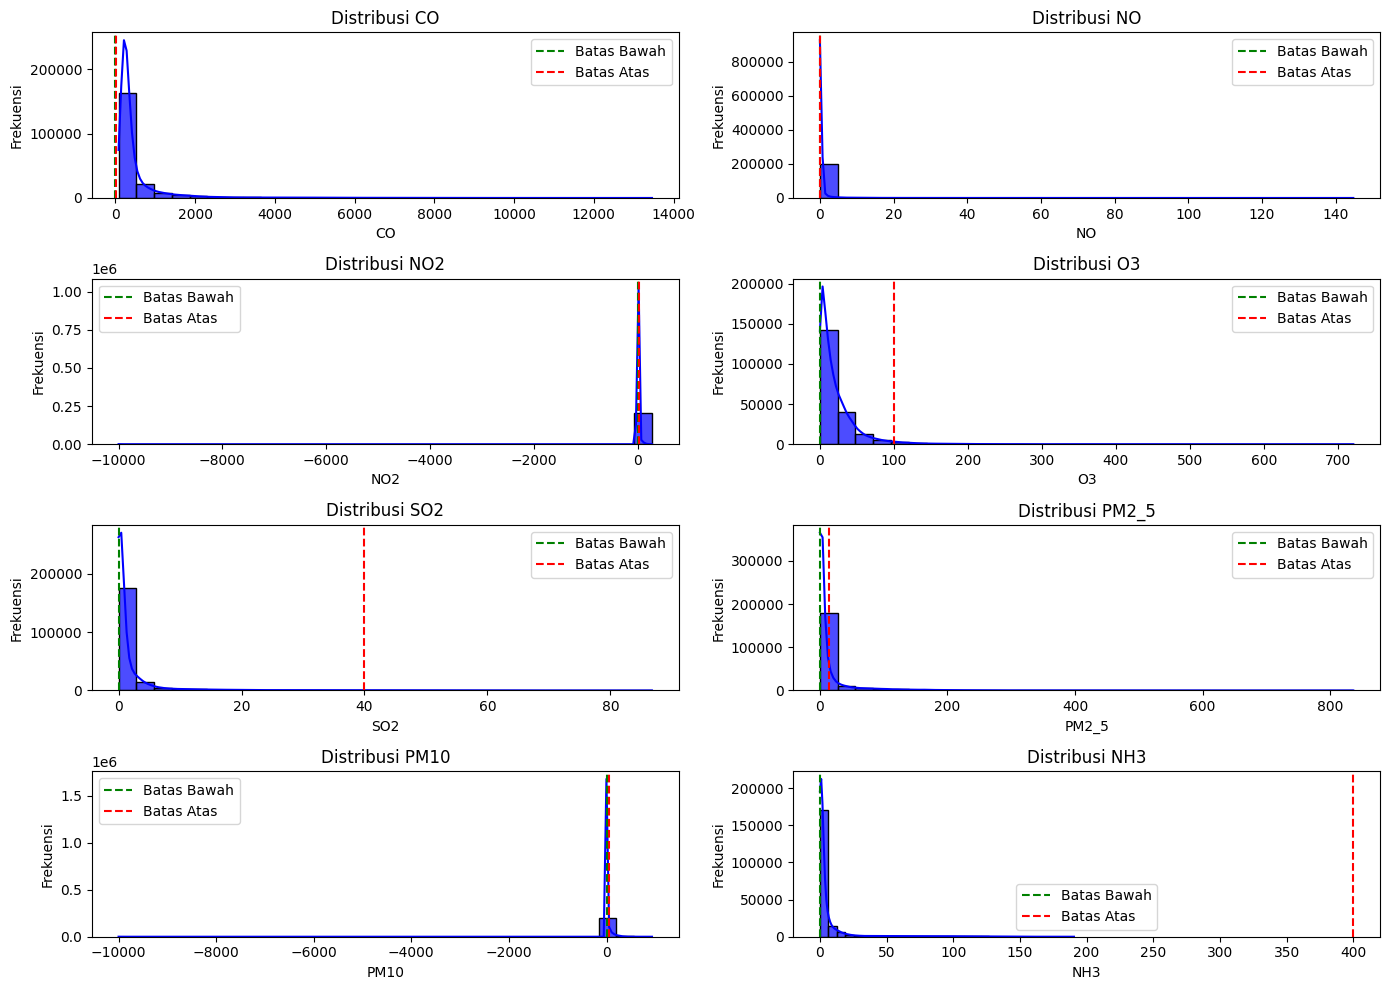

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('combined_data_aqi.csv')

# Standar kesehatan (WHO 2021 atau badan lingkungan lainnya)
thresholds = {
    "co": [0, 4],           # mg/m³
    "no": [0, 0.06],        # ppm
    "no2": [0, 25],         # µg/m³
    "o3": [0, 100],         # µg/m³
    "so2": [0, 40],         # µg/m³
    "pm2_5": [0, 15],       # µg/m³
    "pm10": [0, 45],        # µg/m³
    "nh3": [0, 400]         # µg/m³
}

# Plotting
plt.figure(figsize=(14, 10))
for i, (polutan, (lower, upper)) in enumerate(thresholds.items(), 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[polutan], bins=30, kde=True, color="blue", alpha=0.7)
    plt.axvline(lower, color="green", linestyle="--", label="Batas Bawah")
    plt.axvline(upper, color="red", linestyle="--", label="Batas Atas")
    plt.title(f"Distribusi {polutan.upper()}")
    plt.xlabel(polutan.upper())
    plt.ylabel("Frekuensi")
    plt.legend()

plt.tight_layout()
plt.show()


In [14]:
for polutan, (lower, upper) in thresholds.items():
    below_lower = (data[polutan] < lower).sum()
    above_upper = (data[polutan] > upper).sum()
    print(f"{polutan.upper()} - Below Lower: {below_lower}, Above Upper: {above_upper}")


CO - Below Lower: 0, Above Upper: 206880
NO - Below Lower: 0, Above Upper: 59101
NO2 - Below Lower: 64, Above Upper: 12265
O3 - Below Lower: 0, Above Upper: 5243
SO2 - Below Lower: 0, Above Upper: 1888
PM2_5 - Below Lower: 0, Above Upper: 40799
PM10 - Below Lower: 32, Above Upper: 23409
NH3 - Below Lower: 0, Above Upper: 0
